In [257]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [258]:
voice_usage_info = pd.read_csv("data/VOICE_INCOMING_CALL_USAGE_OFFNET.csv")

voice_usage_info.shape



(36156, 10)

In [259]:
voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),ym,rtom_code,location_code,msan,equp_id,equp_index
0,412244863,ef74b1171331411a4d2e9fada9158215,2,186,202001,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
1,412244863,ef74b1171331411a4d2e9fada9158215,3,114,202002,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
2,662227788,30576ca16275a38f6bb4491015edb96c,10,2435,201909,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
3,412244863,ef74b1171331411a4d2e9fada9158215,14,1061,202003,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
4,412228632,d3439750c4842a755ebfddc64a0b42ae,65,7971,201910,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
...,...,...,...,...,...,...,...,...,...,...
36151,112411111,64879716f309303245754526212d990e,182,20134,202008,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36152,112411111,64879716f309303245754526212d990e,173,14409,201908,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36153,112411111,64879716f309303245754526212d990e,196,19571,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36154,112411111,64879716f309303245754526212d990e,205,17685,201911,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1


In [260]:
# ToDo 
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating call count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [261]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source","ym"], keep="last")

voice_usage_info.shape

(36155, 10)

In [262]:
voice_usage_info = voice_usage_info.drop(['event_source.hash'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','ym':'year-month'}, inplace=True)
voice_usage_info

,event_source,call_count,duration,year-month,rtom_code,location_code,msan,equp_id,equp_index
0,412244863,2,186,202001,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
1,412244863,3,114,202002,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
2,662227788,10,2435,201909,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
3,412244863,14,1061,202003,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
4,412228632,65,7971,201910,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
...,...,...,...,...,...,...,...,...,...
36151,112411111,182,20134,202008,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36152,112411111,173,14409,201908,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36153,112411111,196,19571,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36154,112411111,205,17685,201911,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1


In [263]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0          2
1          3
2         10
3         14
4         65
        ... 
36151    182
36152    173
36153    196
36154    205
36155    242
Name: call_count, Length: 36155, dtype: int64

In [264]:
voice_usage_info.isnull().sum(axis=0)

event_source     0
call_count       0
duration         0
year-month       0
rtom_code        0
location_code    0
msan             0
equp_id          0
equp_index       0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [265]:
voice_usage = voice_usage_info[['event_source','call_count','duration','year-month']]
voice_usage


,event_source,call_count,duration,year-month
0,412244863,2,186,202001
1,412244863,3,114,202002
2,662227788,10,2435,201909
3,412244863,14,1061,202003
4,412228632,65,7971,201910
...,...,...,...,...
36151,112411111,182,20134,202008
36152,112411111,173,14409,201908
36153,112411111,196,19571,201910
36154,112411111,205,17685,201911


In [266]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                                                   \
year-month       201908 201909 201910 201911 201912 202001 202002 202003   
event_source                                                               
112053582            72     45     66     82     27     15      0      0   
112053623             5      0      2      0      0      0      2      1   
112053643           281    253    321    264    192    221    237    162   
112054356            20     17     16      0      0      0      0      0   
112055452            17     37     58     25     26     23     12     35   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
912286932            99    104     84     93    144     71     54     50   
912286967            17     38     37     31     42     19     13      4   
912286996             4      3      0      0      1      0      3      0   
912287030             4      0      0      0      0      4      4      6   
912287049             4      2      1      1      3      1      1      1   

                            ... duration                                     \
year-month   202004 202005  ...   201911 201912 202001 202002 202003 202004   
event_source                ...                                               
112053582         0      0  ...     4171   1403   1508      0      0      0   
112053623         1      0  ...        0      0      0     88    321     40   
112053643       163    196  ...    23680  11903  13158  22212  16368  21500   
112054356         0      0  ...        0      0      0      0      0      0   
112055452        71     23  ...     1040   1725   1477    538   3924   5314   
...             ...    ...  ...      ...    ...    ...    ...    ...    ...   
912286932        39     25  ...     4013   8937   4710   5307   3101   4386   
912286967         3     23  ...     2574   1646   1680    555    132    178   
912286996         2      1  ...        0     57      0    305      0     73   
912287030         6     15  ...        0      0    261    129    790    881   
912287049         1      0  ...       23    143     37     63      6     59   

                                          
year-month   202005 202006 202007 202008  
event_source                              
112053582         0      0      0      0  
112053623         0      0    182    127  
112053643     23958  10171  13438  26783  
112054356         0      0    181    368  
112055452      1111   1532   2131    818  
...             ...    ...    ...    ...  
912286932      1270   2993   2678   1481  
912286967      2089    609    235    528  
912286996       145      7    175      0  
912287030      2214   2033   2892   1711  
912287049         0      0    231     86  

[3329 rows x 26 columns]

In [267]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]


Empty DataFrame
Columns: [(call_count, 201908), (call_count, 201909), (call_count, 201910), (call_count, 201911), (call_count, 201912), (call_count, 202001), (call_count, 202002), (call_count, 202003), (call_count, 202004), (call_count, 202005), (call_count, 202006), (call_count, 202007), (call_count, 202008), (duration, 201908), (duration, 201909), (duration, 201910), (duration, 201911), (duration, 201912), (duration, 202001), (duration, 202002), (duration, 202003), (duration, 202004), (duration, 202005), (duration, 202006), (duration, 202007), (duration, 202008)]
Index: []

[0 rows x 26 columns]

In [268]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [269]:
pivot_voice_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

call_count                                                  \
year-month      201908      201909      201910      201911      201912   
count       3329.00000  3329.00000  3329.00000  3329.00000  3329.00000   
mean          48.44067    47.52598    51.09042    48.65906    51.97236   
std          130.59213   136.98717   145.82699   131.81204   133.12486   
min            0.00000     0.00000     0.00000     0.00000     0.00000   
25%            4.00000     4.00000     5.00000     4.00000     5.00000   
50%           23.00000    24.00000    25.00000    24.00000    26.00000   
75%           57.00000    56.00000    60.00000    58.00000    61.00000   
max         4459.00000  4940.00000  5242.00000  4397.00000  4162.00000   

                                                                        ...  \
year-month      202001      202002      202003      202004      202005  ...   
count       3329.00000  3329.00000  3329.00000  3329.00000  3329.00000  ...   
mean          43.26224    46.80805    43.56083    33.52989    37.42746  ...   
std          125.44991   133.14003   103.47912    86.67630    90.99460  ...   
min            0.00000     0.00000     0.00000     0.00000     0.00000  ...   
25%            4.00000     4.00000     4.00000     1.00000     3.00000  ...   
50%           22.00000    23.00000    21.00000    14.00000    17.00000  ...   
75%           51.00000    54.00000    52.00000    38.00000    44.00000  ...   
max         4728.00000  4506.00000  2723.00000  1873.00000  2708.00000  ...   

                duration                                            \
year-month        201911        201912        202001        202002   
count         3329.00000    3329.00000    3329.00000    3329.00000   
mean          4569.85101    4928.43977    4134.31271    4492.68459   
std          11611.79742   12256.55303   12454.25400   12686.83414   
min              0.00000       0.00000       0.00000       0.00000   
25%            206.00000     264.00000     196.00000     226.00000   
50%           1829.00000    2057.00000    1726.00000    1807.00000   
75%           5435.00000    5787.00000    4823.00000    5105.00000   
max         446444.00000  470223.00000  569355.00000  551829.00000   

                                                                    \
year-month        202003        202004        202005        202006   
count         3329.00000    3329.00000    3329.00000    3329.00000   
mean          4812.55392    4459.83959    4389.07360    4578.25894   
std           9513.73281    8616.81687    8528.61850   10396.66495   
min              0.00000       0.00000       0.00000       0.00000   
25%            240.00000      33.00000     104.00000     187.00000   
50%           1935.00000    1466.00000    1617.00000    1767.00000   
75%           5649.00000    5222.00000    5127.00000    5211.00000   
max         245227.00000  121949.00000  154820.00000  303276.00000   

                                        
year-month        202007        202008  
count         3329.00000    3329.00000  
mean          4975.77531    4968.77321  
std          13038.52050   15332.83668  
min              0.00000       0.00000  
25%            204.00000     217.00000  
50%           1972.00000    1901.00000  
75%           5479.00000    5712.00000  
max         524405.00000  709004.00000  

[8 rows x 26 columns]

In [270]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,event_source,call_count,duration,year-month
count,36155.00000,36155.00000,36155.00000,36155.00000
mean,334648475.79245,54.83114,5550.92640,201968.02605
std,206954407.19394,134.93231,12798.90755,46.04757
min,112053582.00000,1.00000,1.00000,201908.00000
25%,112809457.00000,11.00000,823.00000,201911.00000
50%,332284754.00000,30.00000,2667.00000,202002.00000
75%,512232254.00000,62.00000,6400.00000,202005.00000
max,912287049.00000,5558.00000,709004.00000,202008.00000


In [271]:
# binning call_count
count_bins = [0, 11, 30, 100,300,800,2000,3500, 5558]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-271-2060bf1af780>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,3,3,3,3,2,2,0,0,0,0,0,0,0
112053623,1,0,1,0,0,0,1,1,1,0,0,1,1
112053643,4,4,5,4,4,4,4,4,4,4,4,4,4
112054356,2,2,2,0,0,0,0,0,0,0,0,1,2
112055452,2,3,3,2,2,2,2,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,3,4,3,3,4,3,3,3,3,2,3,3,3
912286967,2,3,3,3,3,2,2,1,1,2,2,2,2
912286996,1,1,0,0,1,0,1,0,1,1,1,1,0


In [272]:
pivot_voice_usage_info['call_count'].describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.00000,3329.000000,3329.000000,3329.000000,3329.000000
mean,2.031241,2.026735,2.072094,2.059778,2.111445,1.963953,2.015320,1.985581,1.68429,1.820667,1.973265,2.042355,2.031241
std,1.321370,1.305340,1.324090,1.295460,1.320790,1.256913,1.287213,1.263308,1.26567,1.259094,1.279533,1.310900,1.298199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,6.00000,7.000000,8.000000,8.000000,8.000000


In [273]:
# binning duration
duration_bins = [0, 840, 2640, 6420,12880,25720,60000,240000,709004]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-273-eb75694b315c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,3,3,3,3,2,2,0,0,0,0,0,0,0
112053623,1,0,1,0,0,0,1,1,1,0,0,1,1
112053643,5,5,5,5,4,5,5,5,5,5,4,5,6
112054356,2,2,1,0,0,0,0,0,0,0,0,1,1
112055452,1,3,4,2,2,2,1,3,3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,3,3,3,3,4,3,3,3,3,2,3,3,2
912286967,2,2,2,2,2,2,1,1,1,2,1,1,1
912286996,1,1,0,0,1,0,1,0,1,1,1,1,0


In [274]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [275]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

### Usage ratings for year-month

In [276]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source,,,,,,,,,,,,,
112053582,9,9,9,9,4,4,0,0,0,0,0,0,0
112053623,1,0,1,0,0,0,1,1,1,0,0,1,1
112053643,20,20,25,20,16,20,20,20,20,20,16,20,24
112054356,4,4,2,0,0,0,0,0,0,0,0,1,2
112055452,2,9,12,4,4,4,2,9,9,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,9,12,9,9,16,9,9,9,9,4,9,9,6
912286967,4,6,6,6,6,4,2,1,1,4,2,2,2


In [277]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [278]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,0.140625,0.140625,0.140625,0.140625,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112053623,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.015625,0.017857,0.023810,0.000000,0.000000,0.015625,0.015625
112053643,0.312500,0.312500,0.390625,0.312500,0.250000,0.312500,0.312500,0.357143,0.476190,0.408163,0.285714,0.312500,0.375000
112054356,0.062500,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250
112055452,0.031250,0.140625,0.187500,0.062500,0.062500,0.062500,0.031250,0.160714,0.214286,0.081633,0.071429,0.062500,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.140625,0.187500,0.140625,0.140625,0.250000,0.140625,0.140625,0.160714,0.214286,0.081633,0.160714,0.140625,0.093750
912286967,0.062500,0.093750,0.093750,0.093750,0.093750,0.062500,0.031250,0.017857,0.023810,0.081633,0.035714,0.031250,0.031250
912286996,0.015625,0.015625,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.023810,0.020408,0.017857,0.015625,0.000000


<AxesSubplot:xlabel='year-month', ylabel='event_source'>

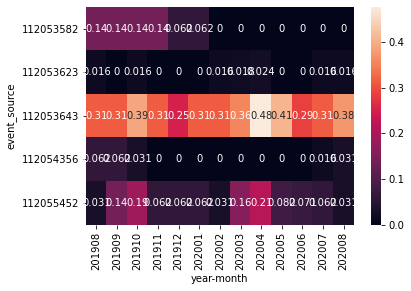

In [279]:
sns.heatmap(pivot_voice_usage_info[year_month_list].head(), annot=True)

In [280]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source,,,,,,,,,,,,,,
112053582,0.140625,0.140625,0.140625,0.140625,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052885
112053623,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.015625,0.017857,0.023810,0.000000,0.000000,0.015625,0.015625,0.009215
112053643,0.312500,0.312500,0.390625,0.312500,0.250000,0.312500,0.312500,0.357143,0.476190,0.408163,0.285714,0.312500,0.375000,0.339834
112054356,0.062500,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625
112055452,0.031250,0.140625,0.187500,0.062500,0.062500,0.062500,0.031250,0.160714,0.214286,0.081633,0.071429,0.062500,0.031250,0.092303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.140625,0.187500,0.140625,0.140625,0.250000,0.140625,0.140625,0.160714,0.214286,0.081633,0.160714,0.140625,0.093750,0.153257
912286967,0.062500,0.093750,0.093750,0.093750,0.093750,0.062500,0.031250,0.017857,0.023810,0.081633,0.035714,0.031250,0.031250,0.057905
912286996,0.015625,0.015625,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.023810,0.020408,0.017857,0.015625,0.000000,0.010785


### Finding Outliers

array([<AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>], dtype=object)

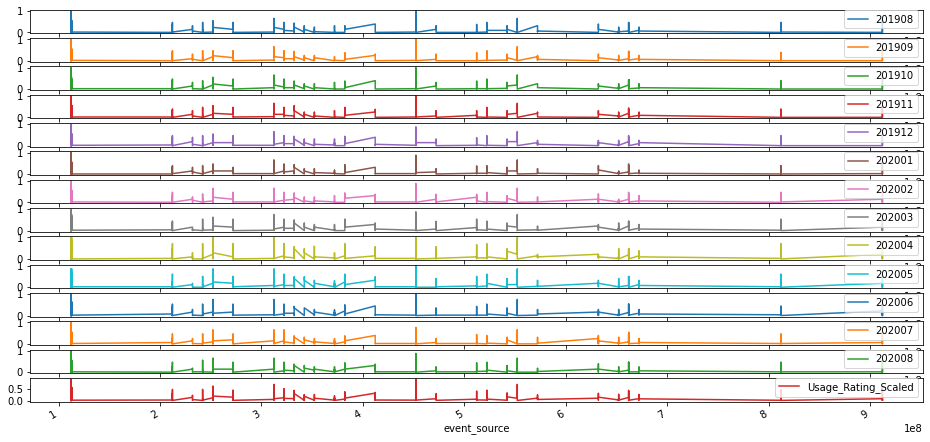

In [281]:
pivot_voice_usage_info.plot.line(subplots=True, figsize=(16,8))

<AxesSubplot:>

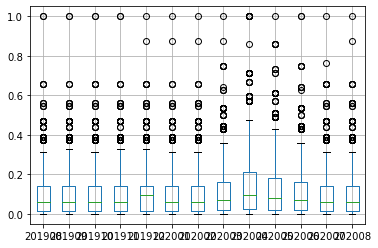

In [282]:
pivot_voice_usage_info.boxplot(column=[201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,])

In [283]:
pivot_voice_usage_info.describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,0.099312,0.097538,0.101124,0.099396,0.104193,0.091244,0.096289,0.111702,0.128295,0.115043,0.108988,0.100983,0.099913,0.104155
std,0.102543,0.099801,0.103081,0.100766,0.103895,0.094929,0.099686,0.114240,0.147237,0.126209,0.114158,0.104894,0.103549,0.098254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001202
25%,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.017857,0.023810,0.020408,0.017857,0.015625,0.015625,0.024267
50%,0.062500,0.062500,0.062500,0.062500,0.093750,0.062500,0.062500,0.071429,0.095238,0.081633,0.071429,0.062500,0.062500,0.083448
75%,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.160714,0.214286,0.183673,0.160714,0.140625,0.140625,0.156299
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.948718


In [284]:
# labling usage bins
bins = [0, 0.1, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,
112053582,0.140625,0.140625,0.140625,0.140625,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052885,LOW
112053623,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.015625,0.017857,0.023810,0.000000,0.000000,0.015625,0.015625,0.009215,LOW
112053643,0.312500,0.312500,0.390625,0.312500,0.250000,0.312500,0.312500,0.357143,0.476190,0.408163,0.285714,0.312500,0.375000,0.339834,HIGH
112054356,0.062500,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625,LOW
112055452,0.031250,0.140625,0.187500,0.062500,0.062500,0.062500,0.031250,0.160714,0.214286,0.081633,0.071429,0.062500,0.031250,0.092303,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.140625,0.187500,0.140625,0.140625,0.250000,0.140625,0.140625,0.160714,0.214286,0.081633,0.160714,0.140625,0.093750,0.153257,MEDIUM
912286967,0.062500,0.093750,0.093750,0.093750,0.093750,0.062500,0.031250,0.017857,0.023810,0.081633,0.035714,0.031250,0.031250,0.057905,LOW
912286996,0.015625,0.015625,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.023810,0.020408,0.017857,0.015625,0.000000,0.010785,LOW


In [285]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
# pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

### Fina Result: Usage Ratings

In [286]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,
112053582,0.140625,0.140625,0.140625,0.140625,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052885,LOW
112053623,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.015625,0.017857,0.023810,0.000000,0.000000,0.015625,0.015625,0.009215,LOW
112053643,0.312500,0.312500,0.390625,0.312500,0.250000,0.312500,0.312500,0.357143,0.476190,0.408163,0.285714,0.312500,0.375000,0.339834,HIGH
112054356,0.062500,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625,LOW
112055452,0.031250,0.140625,0.187500,0.062500,0.062500,0.062500,0.031250,0.160714,0.214286,0.081633,0.071429,0.062500,0.031250,0.092303,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.140625,0.187500,0.140625,0.140625,0.250000,0.140625,0.140625,0.160714,0.214286,0.081633,0.160714,0.140625,0.093750,0.153257,MEDIUM
912286967,0.062500,0.093750,0.093750,0.093750,0.093750,0.062500,0.031250,0.017857,0.023810,0.081633,0.035714,0.031250,0.031250,0.057905,LOW
912286996,0.015625,0.015625,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.023810,0.020408,0.017857,0.015625,0.000000,0.010785,LOW


# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [253]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source,call_count,duration,year-month,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,412244863,2,186,202001,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
1,412244863,3,114,202002,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
2,662227788,10,2435,201909,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,MSAG5200-ISLMT-AVR-NODE467161
3,412244863,14,1061,202003,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
4,412228632,65,7971,201910,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
...,...,...,...,...,...,...,...,...,...,...
36151,112411111,182,20134,202008,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
36152,112411111,173,14409,201908,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
36153,112411111,196,19571,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
36154,112411111,205,17685,201911,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491


In [254]:
voice_location_info = voice_location_info.drop_duplicates("event_source", keep="last")
voice_location_info.shape

(3329, 10)

In [255]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-255-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [256]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,14
1,C300MHT-NE-NODE8152461,18
2,C300MIDH-IDJ-NODE11065541,59
3,C300MKI-NODE10668164,91
4,C300MNW-MEE-NODE18887751,192
5,C300MPDT-NODE13379431,12
6,C300MTP-NODE8700911,20
7,C300MVH-NODE9874041,17
8,MA5603TAD-SRV-NODE10224991,7
9,MSAG5200-ISLBZ-NODE435881,160
